## Task 1

### Explore the data file (named as data.csv)
### a. Load the data
### b. Explore the data, and perform proper visualization to support your data exploration
### c. Perform data cleaning or transformation if necessary (note: if you perform any additional processing, please comment to explain the reason)
### d. Illustrate your discovery or conclusion after data exploration, and use visualization or analysis or support your results

## Solution :

### Import needed libraries

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### a. Load the data

In [2]:
# Load the data by reading in a CSV file called 'data.csv' using the read_csv function from the 'pandas' library

df =pd.read_csv("data.csv")

In [3]:
# Then putting the data into one dataframe 'df'to help with some visualizations as example below data will be organized in two dimensions, rows and columns
df = pd.DataFrame(data=df)

# Add a new column call 'label' to the DataFrame, contains the values from 'time' column. This mean that the 'label' will contain the categories of each one, and the 'time' column will still contain the same values.
df['label'] = df.time
df

,total_bill,tip,smoker,day,time,size,label
0,16.99,1.01,No,Sun,Dinner,2,Dinner
1,10.34,1.66,No,Sun,Dinner,3,Dinner
2,21.01,3.50,No,Sun,Dinner,3,Dinner
3,23.68,3.31,No,Sun,Dinner,2,Dinner
4,24.59,3.61,No,Sun,Dinner,4,Dinner
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,Dinner
240,27.18,2.00,Yes,Sat,Dinner,2,Dinner
241,22.67,2.00,Yes,Sat,Dinner,2,Dinner
242,17.82,1.75,No,Sat,Dinner,2,Dinner


### b. Explore the data, and perform proper visualization to support your data exploration

In [4]:
# There is no relation between smoker and total bills
# Explore the data

# start by looking at the data and see if it needed to be cleaned or preprocessed.
# Use the 'head()' method to see the first 'n' rows of Pandas DataFrame. By default, 'n' is set to 5, so 'df.head()' will return the first 5 rows of the DataFrame.
df.head()

,total_bill,tip,smoker,day,time,size,label
0,16.99,1.01,No,Sun,Dinner,2,Dinner
1,10.34,1.66,No,Sun,Dinner,3,Dinner
2,21.01,3.50,No,Sun,Dinner,3,Dinner
3,23.68,3.31,No,Sun,Dinner,2,Dinner
4,24.59,3.61,No,Sun,Dinner,4,Dinner


In [5]:
# The 'info()' method returns a summary of the information or quick overview contained in a Pandas DataFrame. This is an important step to identifying any potential issues, such as to see missing data.
df.info() #get information on each features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
 6   label       244 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
# Use 'describe()' method to get an overview of the statistical properties of the data in DataFrame.
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# How many missing value in each column? Use 'isna()' method returns a Boolean mask indicating tje location of missing values in Pandas DataFrame. Then use 'sum' method to returns the number of missing values in each column.
df.isna().sum()

total_bill    0
tip           0
smoker        0
day           0
time          0
size          0
label         0
dtype: int64

In [8]:
# df.notna().sum() will count the number of non-missing values in each column
df.notna().sum()

total_bill    244
tip           244
smoker        244
day           244
time          244
size          244
label         244
dtype: int64

In [9]:
# Identify and handle any missing or incomplete data. For example, you can use the
# use dropna from pandas to remove rows or columns woth mising data
df.dropna(axis=0, how='any', subset= None, inplace=True)

In [10]:
# Use 'df.notna().sum()' method to find which column have missing data point? In this case the results will 0 rows, following 'df.isna().sum()' method there is no missing data
df[df.isnull().any(axis=1)]

,total_bill,tip,smoker,day,time,size,label


In [11]:
# The benefits of putting label to help with visualization then use 'value_counts()' method to get an overview of distribution of values in a label column.
meals = df['time'].value_counts()
meals

Dinner    176
Lunch      68
Name: time, dtype: int64

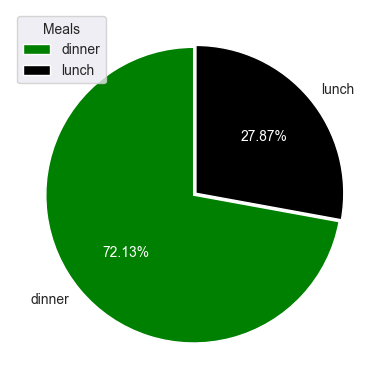

In [13]:
# Create the matplotlib pie chart to get an overview of distribution of meals values in a time column
labels = 'dinner', 'lunch'

# Set the padding between and around the subplots
myexplode = [0.01,0.01]

# Make a list of color
color = ['green', 'black']

# Plot pie chart by using pie chart method in Matplotlib then set autopct to see the percentage of those two categorize.
_,_,meals_pie = plt.pie(meals, labels=labels, startangle= 90, explode=myexplode, colors=color, autopct='%0.2f%%')

# Literate and set the color of meals_pie as white.
for i in meals_pie:
    i.set_color('white')

# To display the figure use show() method
plt.legend(title = 'Meals')
plt.show()

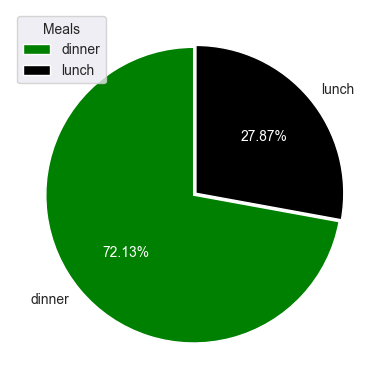

In [12]:
# Create the matplotlib pie chart to get an overview of distribution of meals values in a time column
labels = 'dinner', 'lunch'

# Set the padding between and around the subplots
myexplode = [0.01,0.01]

# Make a list of color
color = ['green', 'black']

# Plot pie chart by using pie chart method in Matplotlib then set autopct to see the percentage of those two categorize.
_,_,meals_pie = plt.pie(meals, labels=labels, startangle= 90, explode=myexplode, colors=color, autopct='%0.2f%%')

# Literate and set the color of meals_pie as white.
for i in meals_pie:
    i.set_color('white')

# To display the figure use show() method
plt.legend(title = 'Meals')
plt.show()

In [15]:
# Use 'values_counts()' methods to count how many day of each different day of total in the working day
day = df['day'].value_counts()
day

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

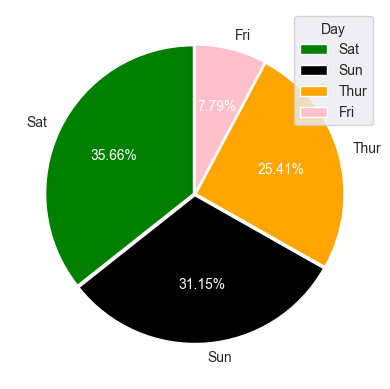

In [16]:
# Create the matplotlib pie chart to get an overview of distribution of values in a time column
labels = 'Sat', 'Sun', 'Thur', 'Fri'

# Set the padding between and around the subplots
myexplode = [0.01,0.01,0.01,0.01]

# Make a list of color
color = ['green', 'black', 'orange','pink']

# Plot pie chart by using pie chart method in Matplotlib then set autopct to see the percentage of those two categorize.
_,_,meals_pie = plt.pie(day, labels=labels, startangle= 90, explode=myexplode, colors=color, autopct='%0.2f%%')

# Literate and set the color of meals_pie as white.
for i in meals_pie:
    i.set_color('white')

# To display the figure use show() method
plt.legend(title = 'Day')
plt.show()

In [21]:
# Use the 'groupby()' method followed by the 'sum' methods to calculate how much of total tip that receive in each day, by trying to group the row of a Pandas DataFrame by the values in the 'day' column, and then compute the sum of the values in the 'tip' column for each group.
value = df[['total_bill']].groupby(df['day']).sum()
value

,tip
day,
Fri,51.96
Sat,260.40
Sun,247.39
Thur,171.83


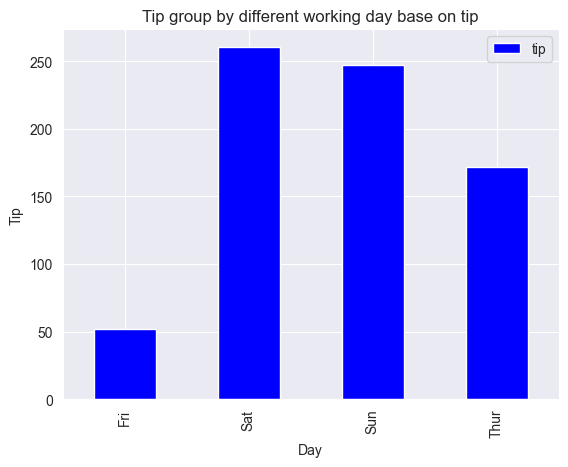

In [26]:
# use pyplot.bar() function to specify categories data. It shows the total tip that is received in each different working day

total_tip = value.plot.bar(color='b', width=0.5)
total_tip.set_title('Tip group by different working day base on tip')
total_tip.set_ylabel('Tip')
total_tip.set_xlabel('Day')
plt.show()

# pie chart on the revenue divided by the day of the week / number of bill for each of the day. Not the value of the bills/ bill generated on each of the day

# แยกรายได้เป็นวัน พฤหัส ศุกร์ กี่เปอเซนต์ เสากี่เปอเซ็นต์ จำนวนบินในแต่ล่ะวันสร้างรายวันได้เท่าไร

In [19]:
# How many people have food in each different time? categorize by the one who smoke and don't smoke.
numberPeopleWhoHaveFood = df[["smoker", "time"]].value_counts()
numberPeopleWhoHaveFood

smoker  time  
No      Dinner    106
Yes     Dinner     70
No      Lunch      45
Yes     Lunch      23
dtype: int64

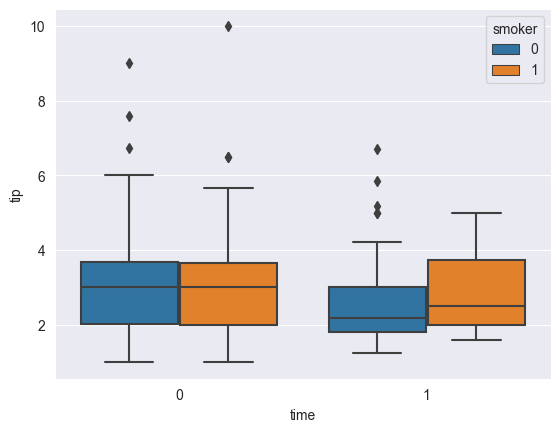

In [38]:
sns.boxplot(x='time', y='tip', hue='smoker', data=df)
plt.show()

# c. Perform data cleaning or transformation if necessary (note: if you perform any additional processing, please comment to explain the reason)


# Preprocessing

# let's scale the data and save it to a separate df

In [23]:
# Scale or normalize the data, if necessary. Some visualize techniques, such as a scatter plot. We can use StandardScalar class from scikit-learn to scale data, or we can use minMaxscarler class to normalize the data
# convert non-numeric number using on hot encoding

# day time smoker and label with label coding
df=pd.get_dummies(df,columns=['day'], prefix='each_day')
df

,total_bill,tip,smoker,time,size,label,each_day_Fri,each_day_Sat,each_day_Sun,each_day_Thur
0,16.99,1.01,No,Dinner,2,Dinner,0,0,1,0
1,10.34,1.66,No,Dinner,3,Dinner,0,0,1,0
2,21.01,3.50,No,Dinner,3,Dinner,0,0,1,0
3,23.68,3.31,No,Dinner,2,Dinner,0,0,1,0
4,24.59,3.61,No,Dinner,4,Dinner,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Dinner,3,Dinner,0,1,0,0
240,27.18,2.00,Yes,Dinner,2,Dinner,0,1,0,0
241,22.67,2.00,Yes,Dinner,2,Dinner,0,1,0,0
242,17.82,1.75,No,Dinner,2,Dinner,0,1,0,0


In [24]:
# label, time and smoker with binary label encoding
labelencoder = preprocessing.LabelEncoder()
df['time'] = labelencoder.fit_transform(df['time'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['label'] = labelencoder.fit_transform(df['label'])
df

,total_bill,tip,smoker,time,size,label,each_day_Fri,each_day_Sat,each_day_Sun,each_day_Thur
0,16.99,1.01,0,0,2,0,0,0,1,0
1,10.34,1.66,0,0,3,0,0,0,1,0
2,21.01,3.50,0,0,3,0,0,0,1,0
3,23.68,3.31,0,0,2,0,0,0,1,0
4,24.59,3.61,0,0,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,3,0,0,1,0,0
240,27.18,2.00,1,0,2,0,0,1,0,0
241,22.67,2.00,1,0,2,0,0,1,0,0
242,17.82,1.75,0,0,2,0,0,1,0,0


In [25]:
# we use MinMaxScaler, preprocessing method in scikit-learn to  scales a feature's values between a given minimum and maximum value.

# create an instance of the MinMaxScaler class, stores it in a variable called scaler
scaler = MinMaxScaler()

# then transform the features of the data so that they are in a consistent scale, which can make the model more robust and improve its performance by use the fit_transform method of the scaler object to transform the features of the data.
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(244, 10)

In [26]:
# this return the new array. We can now use as input to a machine learning
df_scaled

array([[0.29157939, 0.00111111, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1522832 , 0.07333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.3757855 , 0.27777778, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.41055718, 0.11111111, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.30896523, 0.08333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32907415, 0.22222222, 0.        , ..., 0.        , 0.        ,
        1.        ]])

# Training and evaluating

## # Visulize the preprocessed data using a suitable visulazationlibrary such as matplotlib  or seabon

## Find out 'How much tip guess will give to the restaurant?'


In [27]:
# we will predict tip how much the customer will tip the restaurant

# Assign X and Y varibles
X = df.drop('tip', axis=1)
y = df['tip']

In [28]:
#Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [29]:
#Assign algorithm
model = LinearRegression()

In [30]:
# Link algorithm to X and y varibles
model.fit(X_train, y_train)

LinearRegression()

In [31]:
#Find y-intercept
model.intercept_

#Find  X coefficients for each varibles 0 is for total bill then each varibles
model.coef_

array([ 0.0832601 , -0.15448638, -0.0065268 ,  0.21206651, -0.0065268 ,
       -0.03109251, -0.08686899,  0.08216875,  0.03579275])

In [32]:
from sklearn.metrics import mean_absolute_error

# check how accurate the model is
mae_train = mean_absolute_error(y_train, model.predict(X_train))
print("Training set Mean absolute error: %.2f" %mae_train)

mae_test = mean_absolute_error(y_test, model.predict(X_test))
print("Testing data: %.2f" %mae_test)

Training set Mean absolute error: 0.73
Testing data: 0.76


In [33]:
cols = df.columns.tolist()
print("Predict value of customer [")
for variable in cols:
    print("\t0, " + "#" + variable)
print("]")

Predict value of customer [
	0, #total_bill
	0, #tip
	0, #smoker
	0, #time
	0, #size
	0, #label
	0, #each_day_Fri
	0, #each_day_Sat
	0, #each_day_Sun
	0, #each_day_Thur
]


In [34]:
per= [
    30,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    0
]
per = model.predict([per])
print('In inclusion,  from prediction by using linearRegression, the customer will tip the restaurant roughly', per)

In inclusion,  from prediction by using linearRegression, the customer will tip the restaurant roughly [3.51878802]


/home/chonthichar/anaconda3/envs/newProject/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
